In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import callbacks

In [2]:
train_path='./train/'
print(os.listdir(train_path))
print("*"*100)
valid_path='./valid/'
print(os.listdir(valid_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [3]:
folder=(os.listdir(train_path))
folder

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

Text(0.5, 1.0, 'Tomato___healthy')

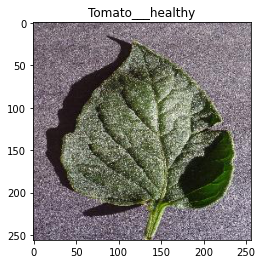

In [4]:
ty=2
index=25
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_path+folder[ty]+"/"+(os.listdir(train_path+folder[ty])[index])))
plt.title(folder[ty])

In [5]:
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

In [7]:
for layer in vgg19.layers:
    layer.trainable=False

In [8]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

In [9]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [10]:
#plateau = callbacks.ReduceLROnPlateau(
          #  monitor='val_loss', 
           # factor=0.2, 
           # patience=7, 
            #verbose=0,
           # mode='min')
callbacks = [callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, verbose=0, mode ='min')]

In [11]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [13]:

train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True)
valid_set=valid_datagen.flow_from_directory(valid_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [14]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

history=model_vgg.fit(train_set,
                validation_data=valid_set,
                epochs=9,
                callbacks=[tb_callback]
                )

Epoch 1/9
625/625 [==============================] - 596s 953ms/step - loss: 0.8698 - accuracy: 0.7080 - val_loss: 0.7102 - val_accuracy: 0.7642
Epoch 2/9
625/625 [==============================] - 594s 950ms/step - loss: 0.5005 - accuracy: 0.8321 - val_loss: 0.6251 - val_accuracy: 0.7856
Epoch 3/9
625/625 [==============================] - 620s 992ms/step - loss: 0.3659 - accuracy: 0.8779 - val_loss: 0.5456 - val_accuracy: 0.8252
Epoch 4/9
625/625 [==============================] - 677s 1s/step - loss: 0.2951 - accuracy: 0.9058 - val_loss: 0.5689 - val_accuracy: 0.8100
Epoch 5/9
625/625 [==============================] - 1128s 2s/step - loss: 0.2513 - accuracy: 0.9179 - val_loss: 0.5815 - val_accuracy: 0.7998
Epoch 6/9
625/625 [==============================] - 860s 1s/step - loss: 0.2221 - accuracy: 0.9275 - val_loss: 0.6237 - val_accuracy: 0.8089
Epoch 7/9
625/625 [==============================] - 855s 1s/step - loss: 0.1710 - accuracy: 0.9457 - val_loss: 0.6364 - val_accuracy: 0.7

Text(0.5, 1.0, 'Training and validation loss')

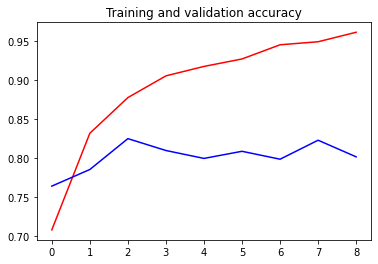

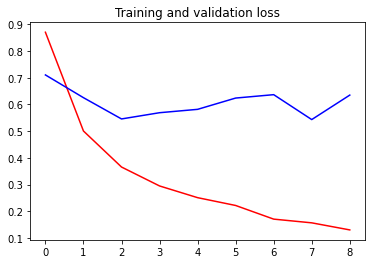

In [15]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

In [16]:
y_pred=model_vgg.predict(valid_set)

62/62 [==============================] - 42s 648ms/step


In [17]:
model_vgg.save('model_vgg19.h5')


In [18]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [19]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [20]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key

In [21]:
ty=9
index=6
#import matplotlib.pyplot as plt
print(folder[ty])
pred=model_vgg.predict([prepare(valid_path+folder[ty]+"/"+(os.listdir(valid_path+folder[ty])[index]))])
prediction_cls(pred)
#plt.title(folder[ty])

Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 382ms/step


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'